In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv('/content/Customers.csv')

In [3]:
products = pd.read_csv('/content/Products.csv')

In [4]:
transactions = pd.read_csv('/content/Transactions.csv')

In [5]:
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])

In [6]:
data=transactions.merge(customers,on='CustomerID',how='left').merge(products,on='ProductID',how='left')

In [8]:
print("\nCustomers Data info:")
print(customers.head())
print("\nProducts Data info :")
print(products.head())
print("\nTransactions Data info :")
print(transactions.head())


Customers Data info:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Products Data info :
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data info :
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166   

In [9]:
print('missing values in customers')
print(customers.isnull().sum())
print('missing values in products')
print(products.isnull().sum())
print('missing values in transactions')
print(transactions.isnull().sum())

missing values in customers
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
missing values in products
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
missing values in transactions
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
print('summary statistics for customers')
print(customers.describe())
print('summary statistics for products')
print(products.describe())
print('summary statistics for transactions')
print(transactions.describe())

summary statistics for customers
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
summary statistics for products
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
summary statistics for transactions
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40

In [11]:
#top customer based on total transaction value
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print('\n top customers by total Value:')
print(top_customers)


 top customers by total Value:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


In [12]:
#top 10 popular product popularity
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print('\n top 10 popular products by quantity sold:')
print(top_products)


 top 10 popular products by quantity sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


In [13]:
#Sales By Regoin
sales_by_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print('\n sales by region:')
print(sales_by_region)


 sales by region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [14]:
#Monthy Popular Item/trends
data['Month'] = data['TransactionDate'].dt.month
monthly_popular_items = data.groupby(['Month', 'ProductName'])['Quantity'].sum()
print('\n monthly popular items:')
print(monthly_popular_items)


 monthly popular items:
Month  ProductName            
1      ActiveWear Biography        2
       ActiveWear Cookbook         1
       ActiveWear Cookware Set     6
       ActiveWear Headphones       5
       ActiveWear Jacket           9
                                  ..
12     TechPro Rug                10
       TechPro Smartwatch          1
       TechPro T-Shirt             2
       TechPro Textbook            7
       TechPro Vase                6
Name: Quantity, Length: 534, dtype: int64


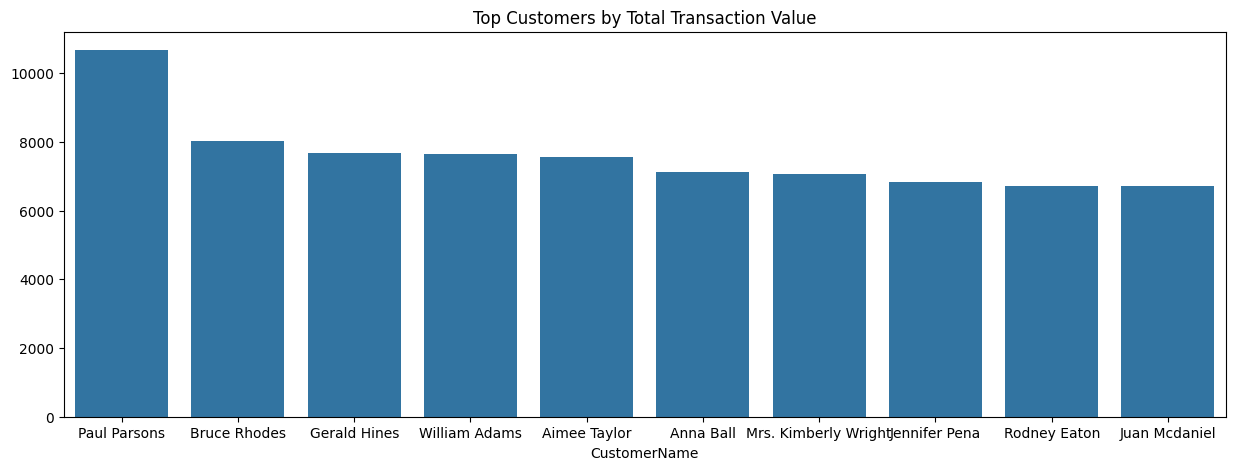

In [17]:
#graph representation
plt.figure(figsize=(15, 5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top Customers by Total Transaction Value')
plt.show()



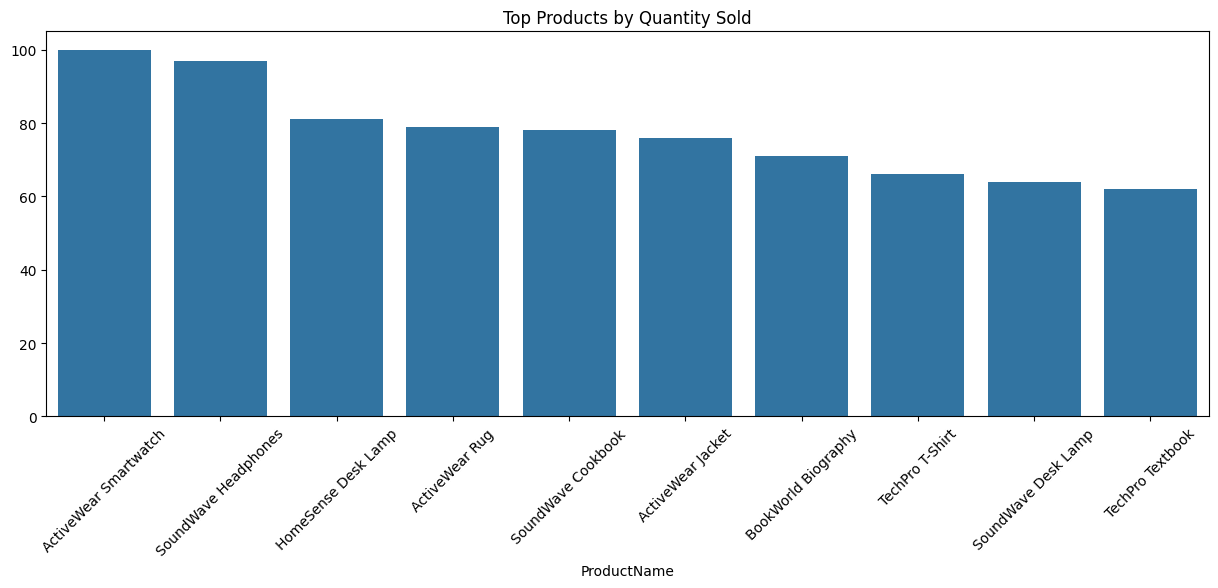

In [18]:
plt.figure(figsize=(15, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top Products by Quantity Sold")
plt.xticks(rotation=45)
plt.show()

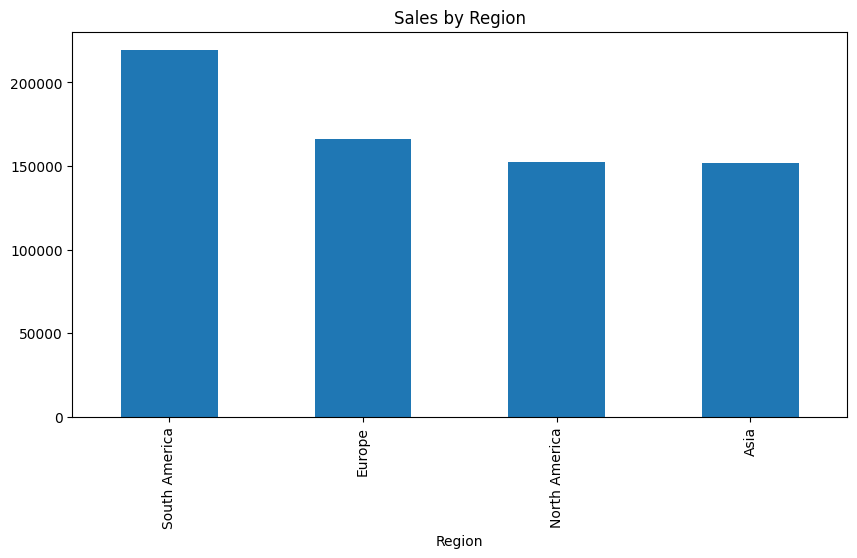

In [22]:
plt.figure(figsize=(10, 5))
sales_by_region.plot(kind='bar', title="Sales by Region")
plt.show()

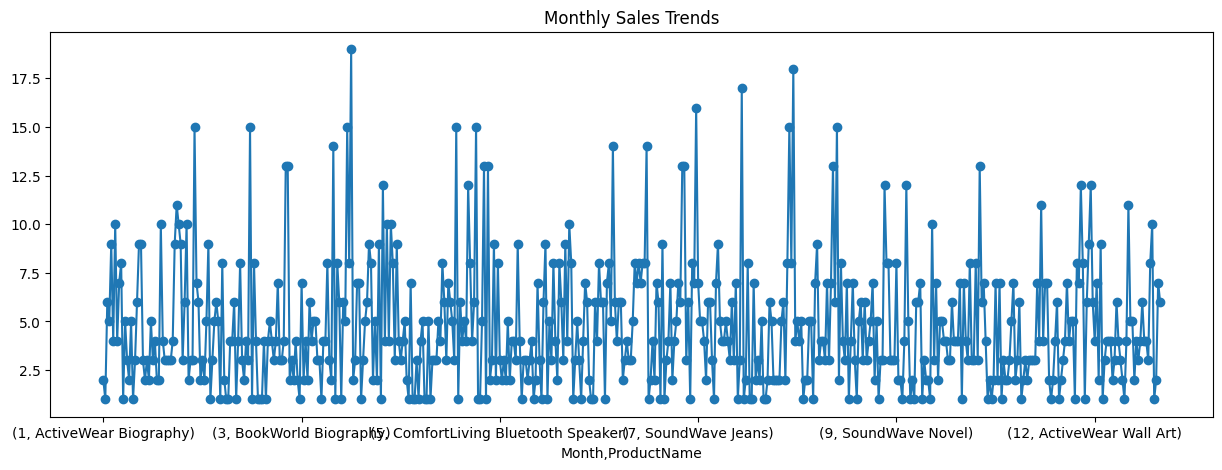

In [21]:
plt.figure(figsize=(15, 5))
monthly_popular_items.plot(kind='line', marker='o', title="Monthly Sales Trends")
plt.show()